In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir("/Users/stellajia/Dropbox/23.Copyright-LLMs")

query_df = pd.read_csv('filedata/query-level-final.csv')
print(query_df.columns)
print(query_df.shape)

query_df.head()

Index(['book_title', 'query_id', 'query', 'book_id', 'gpt35_answer',
       'gpt4o_answer', 'llama8b_answer', 'llama70b_answer', 'claude_answer',
       'gemini_answer', 'correct_answer', 'in_books3', 'num_reviews',
       'num_ratings', 'avg_rating', 'genres', 'pub_year', 'author', 'isbn13',
       'isbn10_v2', 'isbn13_v2', 'fiction', 'nonfiction'],
      dtype='object')
(1079973, 23)


,book_title,query_id,query,book_id,gpt35_answer,gpt4o_answer,llama8b_answer,llama70b_answer,claude_answer,gemini_answer,...,num_ratings,avg_rating,genres,pub_year,author,isbn13,isbn10_v2,isbn13_v2,fiction,nonfiction
0,insight-into-ielts-student's-book-updated-edit...,insight-into-ielts-student's-book-updated-edit...,"WOMAN Oh, it's ... uh ... lovely, darling. Gir...",insightintoieltsstudentsbookupdatededitionthec...,girl,mum,mum,mum,mum,mum,...,75.0,4.16,['Language'],2003.0,"Jakeman, Vanessa, McDowell, Clare",9.780521e+12,NaN,NaN,0.0,1.0
1,insight-into-ielts-student's-book-updated-edit...,insight-into-ielts-student's-book-updated-edit...,"Let's get going shall we, because we've got a ...",insightintoieltsstudentsbookupdatededitionthec...,jack,alex,pearse,john,peter,david,...,75.0,4.16,['Language'],2003.0,"Jakeman, Vanessa, McDowell, Clare",9.780521e+12,NaN,NaN,0.0,1.0
2,insight-into-ielts-student's-book-updated-edit...,insight-into-ielts-student's-book-updated-edit...,"[MASK] Reading Using NO MORE THAN THREE WORDS,...",insightintoieltsstudentsbookupdatededitionthec...,rice plant,researchers,newsweek,flooding,"i apologize, but i cannot reproduce or guess t...",farmers,...,75.0,4.16,['Language'],2003.0,"Jakeman, Vanessa, McDowell, Clare",9.780521e+12,NaN,NaN,0.0,1.0
3,insight-into-ielts-student's-book-updated-edit...,insight-into-ielts-student's-book-updated-edit...,So it produces large quantities of data. It me...,insightintoieltsstudentsbookupdatededitionthec...,sentinel-3,satellite,the instrument.,airs,modis,goes,...,75.0,4.16,['Language'],2003.0,"Jakeman, Vanessa, McDowell, Clare",9.780521e+12,NaN,NaN,0.0,1.0
4,insight-into-ielts-student's-book-updated-edit...,insight-into-ielts-student's-book-updated-edit...,"2 They are rather informal, very direct and ma...",insightintoieltsstudentsbookupdatededitionthec...,ielts,cambridge,"i'm sorry, but i can't help you complete the e...",ielts,ielts,ielts,...,75.0,4.16,['Language'],2003.0,"Jakeman, Vanessa, McDowell, Clare",9.780521e+12,NaN,NaN,0.0,1.0


## Group Data by Books

In [36]:
# for each model answer column (gpt35, gpt4o, claude, llama8b, llama70b, gemini) create a new column with the score which is 0 or 1 based on if it matches correct_answer

model_columns = ['gpt35', 'gpt4o', 'claude', 'llama8b', 'llama70b', 'gemini']
correct_answer_column = 'correct_answer'

for model in model_columns:
    query_df[f'{model}_score'] = (query_df[f'{model}_answer'] == query_df[correct_answer_column]).astype(int)

In [41]:
agg_dict = {f'{model}_score': 'mean' for model in model_columns}
agg_dict.update({col: 'first' for col in query_df.columns if col not in agg_dict})

book_level_df = (
    query_df.groupby('book_id', as_index=False)  # Prevents map_file_name from becoming an index
    .agg(agg_dict)
    .assign(count=query_df.groupby('book_id').size().values)
)

# Remove _answer columns safely
book_level_df = book_level_df.drop(
    columns=[f'{model}_answer' for model in model_columns if f'{model}_answer' in book_level_df.columns]
)

In [42]:
book_level_df = book_level_df.reset_index()
book_level_df.head(2)

,index,gpt35_score,gpt4o_score,claude_score,llama8b_score,llama70b_score,gemini_score,book_title,query_id,query,...,avg_rating,genres,pub_year,author,isbn13,isbn10_v2,isbn13_v2,fiction,nonfiction,count
0,0,0.222222,0.111111,0.152778,0.055556,0.194444,0.138889,"10,000-baby-names:-how-to-choose-the-best-name...","10,000-baby-names:-how-to-choose-the-best-name...","Greek, meaning anointed Christian. Chrysantha ...",...,3.24,None,2010.0,Holly Ivins,9.781905e+12,"['1905410638', '1905410735']","['9781905410637', '9781905410736']",NaN,NaN,72
1,1,0.210526,0.210526,0.157895,0.039474,0.144737,0.223684,"10,000-drinks:-how-to-turn-your-basement-into-...","10,000-drinks:-how-to-turn-your-basement-into-...",[MASK] 1 part 151-Proof Rum 1 part Vodka 1 par...,...,4.36,"['Cookbooks', 'Reference']",2007.0,Paul Knorr,9.781403e+12,"['1402742878', '1402792166']","['9781402742873', '9781402792168']",0.0,1.0,76


## Add Metadata
Popularity and genre

In [45]:
print(book_level_df.shape)
print(book_level_df.columns)

(12916, 25)
Index(['index', 'gpt35_score', 'gpt4o_score', 'claude_score', 'llama8b_score',
       'llama70b_score', 'gemini_score', 'book_title', 'query_id', 'query',
       'book_id', 'correct_answer', 'in_books3', 'num_reviews', 'num_ratings',
       'avg_rating', 'genres', 'pub_year', 'author', 'isbn13', 'isbn10_v2',
       'isbn13_v2', 'fiction', 'nonfiction', 'count'],
      dtype='object')


In [47]:
book_level_df[book_level_df['num_ratings'] < 100000].shape

(12629, 25)

In [48]:
# Remove super high books
## data = data[data['num_ratings'] < 100000]

# Create popularity bins
bins = [0, 10, 100, 1000, 7000000]
labels = ['0-10', '10-100', '100-1000', '1000+']
book_level_df['popularity'] = pd.cut(book_level_df['num_ratings'], bins=bins, labels=labels, include_lowest=True)

In [49]:
book_level_df.head(2)

,index,gpt35_score,gpt4o_score,claude_score,llama8b_score,llama70b_score,gemini_score,book_title,query_id,query,...,genres,pub_year,author,isbn13,isbn10_v2,isbn13_v2,fiction,nonfiction,count,popularity
0,0,0.222222,0.111111,0.152778,0.055556,0.194444,0.138889,"10,000-baby-names:-how-to-choose-the-best-name...","10,000-baby-names:-how-to-choose-the-best-name...","Greek, meaning anointed Christian. Chrysantha ...",...,None,2010.0,Holly Ivins,9.781905e+12,"['1905410638', '1905410735']","['9781905410637', '9781905410736']",NaN,NaN,72,10-100
1,1,0.210526,0.210526,0.157895,0.039474,0.144737,0.223684,"10,000-drinks:-how-to-turn-your-basement-into-...","10,000-drinks:-how-to-turn-your-basement-into-...",[MASK] 1 part 151-Proof Rum 1 part Vodka 1 par...,...,"['Cookbooks', 'Reference']",2007.0,Paul Knorr,9.781403e+12,"['1402742878', '1402792166']","['9781402742873', '9781402792168']",0.0,1.0,76,10-100


In [52]:
book_level_df.shape

(12916, 26)

## Add Shares

In [2]:
shares = pd.read_csv('filedata/shares.csv')

In [4]:
book_level_df = pd.read_csv('tmp/book-level-stella.csv')
print(book_level_df.shape)

(12916, 26)


In [8]:
merged_data = pd.merge(book_level_df, shares, on='pub_year', how='left', indicator=True) # For non-overlapping years should I put 0???
merged_data = merged_data[merged_data['_merge'] == 'both']
merged_data.drop(columns=['_merge'], inplace=True)
# rename Shares to shares
merged_data.rename(columns={'Shares': 'shares'}, inplace=True)
print("final data shape: ", merged_data.shape)

final data shape:  (12462, 28)


In [13]:
shares.head(2)

,pub_year,count_books,Shares
0,1788.0,1,0.000005
1,1833.0,1,0.000005


In [14]:
# First, let's check which publication years are missing from shares
missing_years = book_level_df[~book_level_df['pub_year'].isin(shares['pub_year'])]
print(missing_years['pub_year'].unique())

# If you want to add missing years to shares with a default value:
missing_years_df = pd.DataFrame({
    'pub_year': missing_years['pub_year'].unique(),
    'count_books': 0,  # or could count books per year if needed
    'Shares': 0
})

# Combine with original shares data
shares_updated = pd.concat([shares, missing_years_df], ignore_index=True)
shares_updated = shares_updated.sort_values('pub_year')

[1910. 1692. 1885. 1889. 1935. 1876. 1879. 1689. 1865. 1678. 1573. 1925.
 1751. 1690. 1734. 1798. 1900. 1917. 1864.   nan 1902. 1728. 1921. 1880.
 1710. 1739. 1632. 1792. 1914. 1886. 1913. 1898. 1536. 1759. 1920. 1871.
 1765. 1000. 1812. 1307. 1608. 1875. 1863. 1911. 1909. 1835. 1907. 1250.
 1605. 1791. 1757. 1856. 1748. 1862. 1754. 1785. 1585. 1874. 1860. 1726.
 1597. 1847. 1883. 1890. 1884. 1609. 1786. 1896. 1809. 1892. 1843. 1582.
 1519. 1881. 1635. 1897. 1869. 1606. 1858. 1660. 1687. 1820. 1598. 1870.
 1358. 1845. 1823. 1794. 1834. 1667. 1867. 1906. 1882. 1508. 1868. 1830.
 1888. 1393. 1275. 1854. 1350. 1891. 1813. 1817. 1776. 1919. 1802. 1827.
 1645. 1400. 1839. 1375. 1676. 1844. 1675. 1613. 1669. 1320. 1761. 1201.
 1714. 1737. 1852. 1611. 1427. 1789. 1672. 1790. 1771. 1773. 1513. 1220.
 1696. 1850. 1774. 1424. 1548. 1270. 1634. 1588. 1829. 1713. 1522. 1799.
 1763. 1601. 1840. 1658. 1849. 1814. 1623. 1693.]


In [16]:
shares_updated.to_csv('filedata/shares.csv', index=False)

In [17]:
merged_data2 = pd.merge(book_level_df, shares_updated, on='pub_year', how='left', indicator=True) # For non-overlapping years should I put 0???
merged_data2 = merged_data2[merged_data2['_merge'] == 'both']
merged_data2.drop(columns=['_merge'], inplace=True)
# rename Shares to shares
merged_data2.rename(columns={'Shares': 'shares'}, inplace=True)
print("final data shape: ", merged_data2.shape)

final data shape:  (12916, 28)


In [19]:
# this version of the data has all other years set to 0
merged_data2.to_csv('tmp/book-level-stella.csv', index=False)

In [3]:
import pandas as pd
book = pd.read_csv('tmp/book-level-stella.csv')

In [21]:
book.columns

Index(['index', 'gpt35_score', 'gpt4o_score', 'claude_score', 'llama8b_score',
       'llama70b_score', 'gemini_score', 'book_title', 'query_id', 'query',
       'book_id', 'correct_answer', 'in_books3', 'num_reviews', 'num_ratings',
       'avg_rating', 'genres', 'pub_year', 'author', 'isbn13', 'isbn10_v2',
       'isbn13_v2', 'fiction', 'nonfiction', 'count', 'popularity',
       'count_books', 'shares'],
      dtype='object')

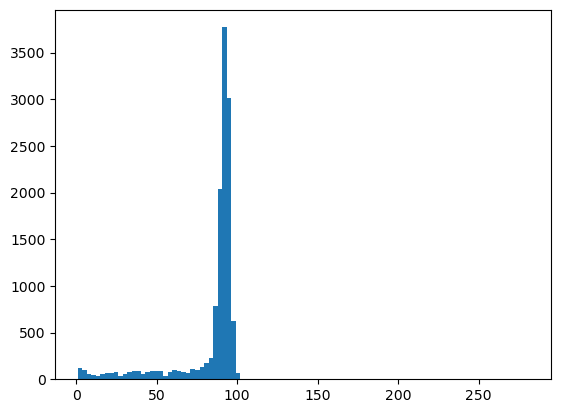

In [4]:
# plot dist of count column
import matplotlib.pyplot as plt
plt.hist(book['count'], bins=100)
plt.show()


In [6]:
# check which books with > 100 count
book[book['count'] > 100]

,index,gpt35_score,gpt4o_score,claude_score,llama8b_score,llama70b_score,gemini_score,book_title,query_id,query,...,author,isbn13,isbn10_v2,isbn13_v2,fiction,nonfiction,count,popularity,count_books,shares
605,605,0.163043,0.125000,0.271739,0.038043,0.581522,0.440217,"american-public-policy:-an-introduction,cochra...","american-public-policy:-an-introduction,cochra...","Due to electronic rights, some third party con...",...,"Cochran, Clarke E.; MAyer, Lawrence C.; Carr, ...",9.780312e+12,NaN,NaN,NaN,NaN,184,10-100,176,0.000915
998,998,0.227513,0.259259,0.275132,0.121693,0.296296,0.343915,applied-mass-communication-theory:-a-guide-for...,applied-mass-communication-theory:-a-guide-for...,Book review: Framed: Labor and the corporate m...,...,"Rosenberry, Jack, Vicker, Lauren A",9.780206e+12,NaN,NaN,NaN,NaN,189,0-10,2914,0.015148
1822,1822,0.059140,0.069892,0.075269,0.026882,0.145161,0.161290,canadian-issues:-essays-in-honour-of-henry-f.-...,canadian-issues:-essays-in-honour-of-henry-f.-...,"Up to 1941 [MASK] made a ""report"" charge on pe...",...,Robert M. Clark,9.781443e+12,NaN,NaN,NaN,NaN,186,0-10,12,0.000062
2062,2062,0.209677,0.220430,0.311828,0.107527,0.311828,0.306452,"classics-in-political-science,roucek,-joseph-s.","classics-in-political-science,roucek,-joseph-s...","[MASK], every form of society has been based, ...",...,"Roucek, Joseph S.",9.781442e+12,NaN,NaN,NaN,NaN,186,0-10,40,0.000208
3700,3700,0.247312,0.177419,0.263441,0.086022,0.338710,0.317204,"four-views-of-time-in-ancient-philosophy,calla...","four-views-of-time-in-ancient-philosophy,calla...","[MASK], op. cit., p. 187. 27 Cf. 36c, where th...",...,"Callahan, John Francis",9.780675e+12,NaN,NaN,0.0,1.0,186,0-10,8,0.000042
3977,3977,0.033149,0.038674,0.038674,0.005525,0.082873,0.033149,"giggsy---the-biography-of-ryan-giggs,frank-wor...","giggsy---the-biography-of-ryan-giggs,frank-wor...",[MASK] gave me two VIP tickets for the final ...,...,Frank Worrall,9.781782e+12,"['1782196560', '1843583224', '1843582058']","['9781782196563', '9781843583226', '9781843582...",0.0,1.0,181,10-100,9456,0.049157
4569,4569,0.037433,0.058824,0.053476,0.016043,0.064171,0.064171,how-to-read-donald-duck-:-imperialist-ideology...,how-to-read-donald-duck-:-imperialist-ideology...,"As in Time v. Geis, 293 F. Supp. 130 (S.D.N.Y....",...,"Ariel Dorfman, Armand Mattelart",9.781945e+12,"['1944869832', '0745339786', '1682191540', '08...","['9781944869830', '9780745339788', '9781682191...",0.0,1.0,187,1000+,30,0.000156
4736,4736,0.032432,0.010811,0.059459,0.005405,0.091892,0.037838,"indian-legends-of-the-pacific-northwest,clark,...","indian-legends-of-the-pacific-northwest,clark,...",This is my work. I must go up and do something...,...,"Clark, Ella E",9.781112e+12,NaN,NaN,1.0,0.0,185,100-1000,20,0.000104
7233,7233,0.027027,0.016216,0.043243,0.010811,0.048649,0.075676,public-health-nursing:-population-centered-hea...,public-health-nursing:-population-centered-hea...,"Interpreting knowledge is affc:""C'ttd by the c...",...,"Stanhope RN FAAN, Marcia, Lancaster RN FAAN, J...",9.780323e+12,NaN,NaN,0.0,1.0,185,100-1000,7,0.000036
9011,9011,0.037634,0.010753,0.037634,0.005376,0.155914,0.016129,"the-catcher-in-the-rye,salinger,-j.d.","the-catcher-in-the-rye,salinger,-j.d.-Boy-23","It really was. The thing was, though, I didn't...",...,Salinger J. D.,9.780242e+12,NaN,NaN,1.0,0.0,186,1000+,8,0.000042


In [27]:
# how many have count 1
print(book[book['count'] == 1].shape)
# how many have count 2
print(book[book['count'] == 2].shape)
# how many have count 3
print(book[book['count'] == 3].shape)
# how many have count 4
print(book[book['count'] == 4].shape)
# how many have count 5
print(book[book['count'] == 5].shape)


(68, 28)
(31, 28)
(26, 28)
(38, 28)
(32, 28)


In [28]:
book.shape

(12916, 28)

In [7]:
import pandas as pd
book_clean = pd.read_csv('/Users/stellajia/Dropbox/23.Copyright-LLMs/rawdata/books3-clean.csv')
book_goodreads = pd.read_csv('/Users/stellajia/Dropbox/23.Copyright-LLMs/rawdata/books3-goodreads.csv')
print(book_clean.shape)
print(book_goodreads.shape)


/var/folders/z6/z9tskd292wdfw_xwdmtspfmw0000gn/T/ipykernel_25721/2403750844.py:3: DtypeWarning: Columns (10,11,12,15,16,17,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  book_goodreads = pd.read_csv('/Users/stellajia/Dropbox/23.Copyright-LLMs/rawdata/books3-goodreads.csv')


(195977, 13)
(518684, 25)


In [8]:
isbndb_goodreads = pd.read_csv('/Users/stellajia/Dropbox/23.Copyright-LLMs/rawdata/isbndb-goodreads.csv')
print(isbndb_goodreads.shape)


/var/folders/z6/z9tskd292wdfw_xwdmtspfmw0000gn/T/ipykernel_25721/1119283507.py:1: DtypeWarning: Columns (10,11,12,15,16,17,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  isbndb_goodreads = pd.read_csv('/Users/stellajia/Dropbox/23.Copyright-LLMs/rawdata/isbndb-goodreads.csv')


(518684, 25)
